In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

Om te beginnen kunnen we uit de data dictionary halen welke colommen uberhaupt van waarde zijn.<br>
Als eerste stap in het opschonen negeren we alle NVT/Niet van toepasing's colommen.

In [19]:
usefullcols = ['stm_mon_nr','stm_sap_meld_ddt','stm_status_melding_sap','stm_km_van_mld','stm_km_tot_mld','stm_km_van_gst',
'stm_km_tot_gst','stm_fh_tijd','stm_sap_melddatum','stm_aanngeb_tijd','stm_aanntpl_tijd','stm_arbeid',
'stm_progfh_in_tijd','stm_progfh_in_invoer_tijd','stm_progfh_in_duur','stm_sap_storeindtijd','stm_progfh_gw_tijd',
'stm_reactie_duur','stm_progfh_gw_duur','stm_progfh_gw_teller','stm_afspr_aanvangdd','stm_afspr_aanvangtijd',
'stm_fh_duur','stm_evb','stm_sap_meldtijd','stm_sap_meldtekst_lang','stm_prioriteit','stm_oh_pg_gst',
'stm_sap_meldtekst','stm_techn_gst','stm_contractgeb_gst','stm_tao_indicator','stm_geo_mld','stm_functiepl_mld',
'stm_geo_mld_uit_functiepl','stm_aanngeb_ddt','stm_aanngeb_dd','stm_oorz_code','stm_oorz_groep','stm_oorz_tkst',
'stm_fh_dd','stm_fh_status','stm_geo_gst','stm_functiepl_gst','stm_geo_gst_uit_functiepl','stm_fh_ddt',
'stm_aanntpl_dd','stm_techn_mld','stm_sap_storeinddatum','stm_equipm_nr_mld','stm_equipm_soort_mld',
'stm_equipm_omschr_mld','stm_sap_storeind_ddt','stm_contractgeb_mld','stm_equipm_nr_gst','stm_equipm_soort_gst',
'stm_equipm_omschr_gst','stm_progfh_in_invoer_dat','stm_progfh_in_datum','stm_oorz_tekst_kort','stm_dstrglp_naar',
'stm_tao_indicator_vorige','stm_vl_post','stm_dstrglp_van','stm_pplg_van','stm_tao_soort_mutatie',
'stm_progfh_gw_lwd_tijd','stm_pplg_naar','stm_progfh_gw_lwd_datum']

nvt = ['stm_sap_mon_meld_ddt','stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld','stm_scenario_mon','stm_mon_nr_status_omschr',
'stm_mon_nr__statuscode','stm_mon_nr_status_wijzdd','stm_aanntpl_ddt','stm_objectdl_code_gst','stm_objectdl_groep_gst',
'stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep',
'stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect','stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident',
'stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_progfh_gw_datum',
'stm_mon_eind_datum','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn',
'stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie',
'stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr',
'stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd',
'stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam',
'stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']

In [20]:
df = pd.read_csv('sap_storing_data_hu_project.csv',usecols=usefullcols, low_memory=True)

C:\Python383\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (11,24,27,49,51,55,56,73,75,78,80,82,86,87,91,95,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
df

,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_lwd_datum,stm_progfh_gw_lwd_tijd,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624,624.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 09:00:00,81S,624,624.0,NaN,NaN,NaN,0.0,0.0,ONR-RIB,133.0,Papieren ontbreken,02/01/2006 09:00:00,4.0,02/01/2006 09:00:00,N,NaN,NaN,"0,00",02/01/2006,09:00:00,NaN,624,NaN,81.0,624,S,02/01/2006,09:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,09:00:00,0.0,1.000000e+08,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN
1,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201,201.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 12:35:00,37B,201,201.0,NaN,NaN,NaN,30200.0,0.0,ONR-DERD,143.0,NaN,02/01/2006 13:26:00,4.0,02/01/2006 13:26:00,N,NaN,NaN,"0,00",02/01/2006,12:35:00,NaN,201,NaN,37.0,201,B,02/01/2006,12:35:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,13:26:00,51.0,1.000000e+08,02/01/2006,13:26:00,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
2,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25,25.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 16:40:00,32B,25,25.0,NaN,NaN,NaN,14000.0,0.0,ONR-DERD,142.0,NaN,02/01/2006 17:20:00,4.0,02/01/2006 17:20:00,N,NaN,NaN,"0,00",02/01/2006,16:40:00,NaN,025,NaN,32.0,025,B,02/01/2006,16:40:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,17:20:00,40.0,1.000000e+08,02/01/2006,17:20:00,Persoon langs de baan,NaN,NaN,Hgl,NaN
3,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12,12.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 22:30:00,35B,12,12.0,NaN,NaN,NaN,19819.0,0.0,ONR-DERD,142.0,NaN,02/01/2006 22:36:00,4.0,02/01/2006 22:36:00,N,NaN,NaN,"0,00",02/01/2006,22:30:00,NaN,012,NaN,35.0,012,B,02/01/2006,22:30:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,22:36:00,6.0,1.000000e+08,02/01/2006,22:36:00,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN
4,38.0,EHV,02/01/2006 11:23:00,Logboeknr RBV : 38 Tijd: 1123 VL-Post: ...,Logboeknr RBV : 38 Tijd: 1123 VL-P,614,614.0,10621391.0,DETECTREIN,GRS SSL Ht,0.0,0.0,9.0,MAFS,02/01/2006 11:23:00,21S,614,614.0,10621391.0,DETECTREIN,GRS SSL Ht,0.0,0.0,TECHONV,218.0,NaN,02/01/2006 11:30:00,4.0,NaN,N,NaN,NaN,"0,60",02/01/2006,11:23:00,21.0,614-601-1000038436,S,21.0,614-601-1000038436,S,02/01/2006,11:23:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,11:30:00,7.0,1.000000e+08,NaN,00:00:00,Geen SMC-melding.Geen onderzoek geweest.,NaN,

In [22]:
df.shape

(898525, 69)

In [23]:
def initEmpty():
    empty = df.isna().sum().to_frame(name='count').reset_index().rename(columns={"index":"colnames"})
    return empty[empty['count'] > 0].sort_values(by='count',ascending=False).reset_index(drop=True)
empty = initEmpty()

In [24]:
f'There are a total of {empty.shape[0]} columns with empty values.'

'There are a total of 67 columns with empty values.'

Hier zie je een verloop van alle colomm-id's met alle lege waardes

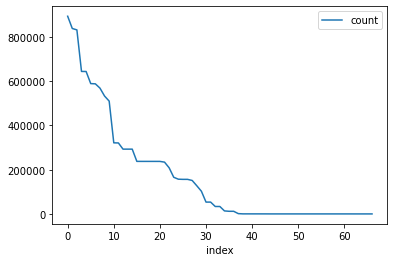

In [25]:
empty.reset_index().plot(kind='line', x='index', y='count')

Dit zijn de meest betrouwbare colommen, met een leeg waarde van 5%.

In [26]:
# print(f'stm_geo_mld: {int(empty[empty["colnames"] == "stm_geo_mld"]["count"]) / df.shape[0] * 100}%')
# print(f'stm_oorz_code: {int(empty[empty["colnames"] == "stm_oorz_code"]["count"]) / df.shape[0] * 100}%')
# print(f'stm_fh_dd: {int(empty[empty["colnames"] == "stm_fh_dd"]["count"]) / df.shape[0] * 100}%')
# print(f'stm_sap_storeinddatum: {int(empty[empty["colnames"] == "stm_sap_storeinddatum"]["count"]) / df.shape[0] * 100}%')
# print(f'stm_progfh_gw_lwd_datum: {int(empty[empty["colnames"] == "stm_progfh_gw_lwd_datum"]["count"]) / df.shape[0] * 100}%')

# empty['min'] = df[empty['colnames']].min().reset_index(name='min')['min']
# empty['max'] = df[empty['colnames']].max().reset_index(name='max')['max']
# empty['med'] = df[empty['colnames']].median().reset_index(name='median')['median']
# empty['mean'] = df[empty['colnames']].mean().reset_index(name='mean')['mean']
# empty['dtype'] = df[empty['colnames']].dtypes.reset_index(name='dtype')['dtype']
def showEmpty(_empty):
    _empty['perc'] = _empty['count'] / df.shape[0] * 100
    print(f'De verhouding afwezige waardes op het totaal')
    display(_empty[:37])
    display(_empty[37:])
showEmpty(empty)

De verhouding afwezige waardes op het totaal


,colnames,count,perc
0,stm_progfh_gw_lwd_datum,893513,99.442197
1,stm_pplg_naar,838137,93.279208
2,stm_progfh_gw_lwd_tijd,831833,92.577613
3,stm_tao_soort_mutatie,644025,71.675802
4,stm_pplg_van,643776,71.648090
5,stm_dstrglp_van,589041,65.556440
6,stm_vl_post,588026,65.443477
7,stm_tao_indicator_vorige,568684,63.290838
8,stm_dstrglp_naar,532765,59.293286
9,stm_oorz_tekst_kort,509895,56.748004


,colnames,count,perc
37,stm_tao_indicator,1318,0.146685
38,stm_techn_gst,222,0.024707
39,stm_contractgeb_gst,222,0.024707
40,stm_sap_meldtekst,198,0.022036
41,stm_oh_pg_gst,188,0.020923
42,stm_prioriteit,160,0.017807
43,stm_sap_meldtekst_lang,139,0.015470
44,stm_progfh_gw_duur,37,0.004118
45,stm_sap_storeindtijd,37,0.004118
46,stm_reactie_duur,37,0.004118


In [27]:
df.describe()

,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_code,stm_fh_status,stm_contractgeb_mld,stm_contractgeb_gst,stm_arbeid,stm_progfh_gw_lwd_datum,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
count,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,741568.000000,6.057210e+05,8.985210e+05,8.985210e+05,845113.000000,747318.000000,661017.000000,898303.000000,8.984880e+05,5.012000e+03,898488.000000,898488.000000,8.984880e+05
mean,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,321.455539,1.062666e+07,2.664714e+04,1.245256e+04,193.577248,1.802484,25.261916,25.117415,3.976436e+06,2.015865e+07,0.201329,923.148771,8.845657e+07
std,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,270.687469,4.755891e+05,7.841763e+04,6.410697e+04,48.310779,1.182432,19.725904,19.444268,1.990988e+07,8.164792e+03,0.498747,6404.546787,2.712747e+08
min,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,33.000000,1.000000,0.000000,0.000000,-1.167950e+05,2.013113e+07,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,79.000000,1.021172e+07,0.000000e+00,0.000000e+00,144.000000,1.000000,9.000000,9.000000,0.000000e+00,2.016022e+07,0.000000,11.000000,1.800000e+01
50%,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,203.000000,1.056452e+07,5.000000e+03,0.000000e+00,213.000000,1.000000,22.000000,23.000000,3.000000e+00,2.016061e+07,0.000000,84.000000,6.700000e+01
75%,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,545.000000,1.092778e+07,3.751500e+04,0.000000e+00,221.000000,2.000000,33.000000,32.000000,4.700000e+01,2.016103e+07,0.000000,256.000000,1.318000e+03
max,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,952.000000,3.039590e+07,3.096056e+07,3.096056e+07,999.000000,9.000000,99.000000,99.000000,1.057679e+09,2.017050e+07,150.000000,528297.000000,1.060469e+09


De colommen met index 0 - 29 hebben echt aandacht nodig.

In [28]:
','.join(empty[37:]['colnames'])
# '\',\''.join(empty['colnames'])

'stm_tao_indicator,stm_techn_gst,stm_contractgeb_gst,stm_sap_meldtekst,stm_oh_pg_gst,stm_prioriteit,stm_sap_meldtekst_lang,stm_progfh_gw_duur,stm_sap_storeindtijd,stm_reactie_duur,stm_fh_duur,stm_fh_tijd,stm_afspr_aanvangtijd,stm_afspr_aanvangdd,stm_aanngeb_tijd,stm_progfh_gw_teller,stm_evb,stm_sap_melddatum,stm_progfh_gw_tijd,stm_progfh_in_duur,stm_progfh_in_invoer_tijd,stm_sap_meldtijd,stm_progfh_in_tijd,stm_arbeid,stm_aanntpl_tijd,stm_km_tot_gst,stm_km_van_gst,stm_km_van_mld,stm_status_melding_sap,stm_km_tot_mld'

Het verschil tussen de melding(\_mld) colomn en de plaatselijke vastgestelde (\_gst) waarmeming colomn.<br>
Volgens de product owner is de data bijna identiek.<br>
Voor het opschonen halen we ook de colom met het minst aantal waardes er uit.

Met als eventuele stap mocht er een mismatch in data populatie zijn de colommen samenvoegen.

In [29]:
dubbleCol = ['stm_equipm_omschr_*', 'stm_equipm_soort_*', 'stm_equipm_nr_*', 
             'stm_geo_*_uit_functiepl', 'stm_functiepl_*', 'stm_geo_*',
            'stm_km_van_*','stm_km_tot_*',
            'stm_contractgeb_*','stm_techn_*']
original = 'mld'
optional = ['gst'] # Order of least to most important
for colPH in dubbleCol:
    colOg = colPH.replace('*',original)
    
    for option in optional:
        colOp = colPH.replace('*',option)
        df[colPH] = np.where(df[colOp].isna(), df[colOg], df[colOp])
        df.drop(columns=[colOp],inplace=True)
    df.drop(columns=[colOg],inplace=True)

In [30]:
display(df)
df.shape

,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_oh_pg_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_lwd_datum,stm_progfh_gw_lwd_tijd,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar,stm_equipm_omschr_*,stm_equipm_soort_*,stm_equipm_nr_*,stm_geo_*_uit_functiepl,stm_functiepl_*,stm_geo_*,stm_km_van_*,stm_km_tot_*,stm_contractgeb_*,stm_techn_*
0,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,9.0,MAFS MAFD,02/01/2006 09:00:00,81S,ONR-RIB,133.0,Papieren ontbreken,02/01/2006 09:00:00,4.0,02/01/2006 09:00:00,N,NaN,NaN,"0,00",02/01/2006,09:00:00,02/01/2006,09:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,09:00:00,0.0,1.000000e+08,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.0,624,624,0.0,0.0,81.0,S
1,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,9.0,MAFS,02/01/2006 12:35:00,37B,ONR-DERD,143.0,NaN,02/01/2006 13:26:00,4.0,02/01/2006 13:26:00,N,NaN,NaN,"0,00",02/01/2006,12:35:00,02/01/2006,12:35:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,13:26:00,51.0,1.000000e+08,02/01/2006,13:26:00,schapen op de spoorbaan!,NaN,NaN,Lp,Apg,NaN,NaN,NaN,201.0,201,201,30200.0,0.0,37.0,B
2,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,9.0,MAFS MAFD,02/01/2006 16:40:00,32B,ONR-DERD,142.0,NaN,02/01/2006 17:20:00,4.0,02/01/2006 17:20:00,N,NaN,NaN,"0,00",02/01/2006,16:40:00,02/01/2006,16:40:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,17:20:00,40.0,1.000000e+08,02/01/2006,17:20:00,Persoon langs de baan,NaN,NaN,Hgl,NaN,NaN,NaN,NaN,25.0,025,25,14000.0,0.0,32.0,B
3,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,9.0,MAFS,02/01/2006 22:30:00,35B,ONR-DERD,142.0,NaN,02/01/2006 22:36:00,4.0,02/01/2006 22:36:00,N,NaN,NaN,"0,00",02/01/2006,22:30:00,02/01/2006,22:30:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,22:36:00,6.0,1.000000e+08,02/01/2006,22:36:00,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN,NaN,NaN,NaN,12.0,012,12,19819.0,0.0,35.0,B
4,38.0,EHV,02/01/2006 11:23:00,Logboeknr RBV : 38 Tijd: 1123 VL-Post: ...,Logboeknr RBV : 38 Tijd: 1123 VL-P,9.0,MAFS,02/01/2006 11:23:00,21S,TECHONV,218.0,NaN,02/01/2006 11:30:00,4.0,NaN,N,NaN,NaN,"0,60",02/01/2006,11:23:00,02/01/2006,11:23:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,1e+08,00:00:00,NaN,NaN,1e+08,0.0,00/00/0000,00:00:00,02/01/2006,11:30:00,7.0,1.000000e+08,NaN,00:00:00,Geen SMC-melding.Geen onderzoek geweest.,NaN,NaN,Ht,NaN,GRS SSL Ht,DETECTREIN,10621391.0,614.0,614-601-1000038436,614,0.0,0.0,21.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898520,0.0,NaN,11/05/2013 08:06:00,GVC : sp-2 en 3 stop lampen op de stootjukke...,GVC : sp-2 en 3 stop lampen op de stoot,5.0,MAFS,11/05/2013 08:06:00,02B,TECHONV,215.0,accu's waren leeg. Oo

(898525, 59)

Nu moeten we beslissen welke colommen echt noodzakelijk zijn en waar we niet zonder kunnen (feature colommen), dus wanneer er lege waardes in een rij staan we echt die rij moeten verwijderen.<br>
`stm_sap_meld_ddt(stm_sap_melddatum/stm_sap_meldtijd), stm_fh_tijd, stm_sap_storeind_ddt`<br>
En wat zijn interessante colommen waar we geen lege waardes willen maar een empty placeholder zodat we de feature kunnen blijven gebruiken. `stm_prioriteit, stm_oorz_code, stm_fh_status, stm_progfh_in_invoer_tijd, stm_progfh_in_tijd`

In [31]:
showEmpty(initEmpty())

De verhouding afwezige waardes op het totaal


,colnames,count,perc
0,stm_progfh_gw_lwd_datum,893513,99.442197
1,stm_pplg_naar,838137,93.279208
2,stm_progfh_gw_lwd_tijd,831833,92.577613
3,stm_tao_soort_mutatie,644025,71.675802
4,stm_pplg_van,643776,71.648090
5,stm_dstrglp_van,589041,65.556440
6,stm_vl_post,588026,65.443477
7,stm_tao_indicator_vorige,568684,63.290838
8,stm_dstrglp_naar,532765,59.293286
9,stm_oorz_tekst_kort,509895,56.748004


,colnames,count,perc
37,stm_reactie_duur,37,0.004118
38,stm_progfh_in_duur,37,0.004118
39,stm_fh_tijd,37,0.004118
40,stm_arbeid,37,0.004118
41,stm_evb,37,0.004118
42,stm_sap_melddatum,37,0.004118
43,stm_sap_meldtijd,37,0.004118
44,stm_aanngeb_tijd,37,0.004118
45,stm_afspr_aanvangtijd,37,0.004118
46,stm_aanntpl_tijd,37,0.004118


In [32]:
toDrop = ['stm_sap_meld_ddt','stm_sap_melddatum','stm_sap_meldtijd',
         'stm_fh_tijd','stm_sap_storeindtijd']
df.dropna(subset=toDrop,inplace=True)
df.shape

(898488, 59)

In [33]:
showEmpty(initEmpty())

De verhouding afwezige waardes op het totaal


,colnames,count,perc
0,stm_progfh_gw_lwd_datum,893476,99.442174
1,stm_pplg_naar,838100,93.278931
2,stm_progfh_gw_lwd_tijd,831796,92.577308
3,stm_tao_soort_mutatie,643993,71.675192
4,stm_pplg_van,643739,71.646922
5,stm_dstrglp_van,589004,65.555021
6,stm_vl_post,588002,65.443501
7,stm_tao_indicator_vorige,568667,63.291552
8,stm_dstrglp_naar,532728,59.291610
9,stm_oorz_tekst_kort,509858,56.746223


,colnames,count,perc


In [46]:
df['stm_prioriteit'] = df['stm_prioriteit'].fillna(1) # Laagste prio
df['stm_oorz_code'] = df['stm_oorz_code'].fillna(299) # 'Niet gemeld' code
df['stm_fh_status'] = df['stm_fh_status'].fillna(1) # Median of values
df['stm_aanngeb_tijd'] = df['stm_aanngeb_tijd'].fillna(df['stm_sap_meldtijd']) # Aannemer beltijd gelijk met melding zetten.
df['stm_progfh_in_invoer_tijd'] = df['stm_progfh_in_invoer_tijd'].fillna(df['stm_aanngeb_tijd']) # Tijd van prognose op beltijd zetten.
df['stm_equipm_nr_*'] = df['stm_equipm_nr_*'].fillna(0)
df['stm_contractgeb_*'] = df['stm_contractgeb_*'].fillna(0)

In [42]:
showEmpty(initEmpty())

De verhouding afwezige waardes op het totaal


,colnames,count,perc
0,stm_progfh_gw_lwd_datum,893476,99.442174
1,stm_pplg_naar,838100,93.278931
2,stm_progfh_gw_lwd_tijd,831796,92.577308
3,stm_tao_soort_mutatie,643993,71.675192
4,stm_pplg_van,643739,71.646922
5,stm_dstrglp_van,589004,65.555021
6,stm_vl_post,588002,65.443501
7,stm_tao_indicator_vorige,568667,63.291552
8,stm_dstrglp_naar,532728,59.291610
9,stm_oorz_tekst_kort,509858,56.746223


,colnames,count,perc


Waardes die duidelijk een int zijn van float terughalen naar een int.

In [47]:
df['stm_prioriteit'] = df['stm_prioriteit'].astype(int)
df['stm_oorz_code'] = df['stm_oorz_code'].astype(int)
df['stm_fh_status'] = df['stm_fh_status'].astype(int)
df['stm_progfh_gw_teller'] = df['stm_progfh_gw_teller'].astype(int)
df['stm_equipm_nr_*'] = df['stm_equipm_nr_*'].astype(int)
df['stm_contractgeb_*'] = df['stm_contractgeb_*'].astype(int)